# DBSCAN clustering
 
In this notebook, we will look at an example of DBSCAN clustering. First we load the classic modules as well as a few new ones.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

We make an example dataset to work with first. Let's make 12 samples at random:

In [2]:
X, y = make_blobs(random_state=0, n_samples=12)
X

array([[ 3.54934659,  0.6925054 ],
       [ 1.9263585 ,  4.15243012],
       [ 0.0058752 ,  4.38724103],
       [ 1.12031365,  5.75806083],
       [ 1.7373078 ,  4.42546234],
       [ 2.36833522,  0.04356792],
       [-0.49772229,  1.55128226],
       [-1.4811455 ,  2.73069841],
       [ 0.87305123,  4.71438583],
       [-0.66246781,  2.17571724],
       [ 0.74285061,  1.46351659],
       [ 2.49913075,  1.23133799]])

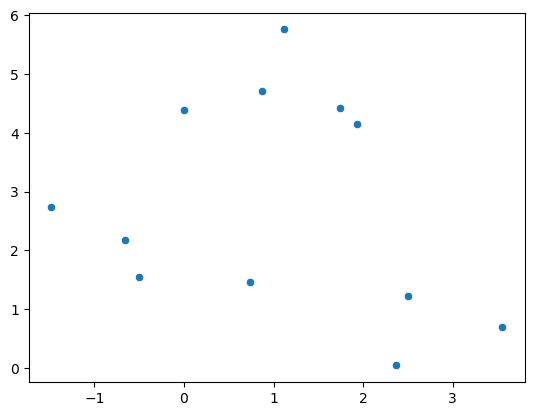

In [3]:
sns.scatterplot(x = X[:, 0], y = X[:, 1])
plt.show()

We use DBSCAN with default parameters to cluster these samples:
* eps=0.5
* min_samples=5

In [4]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)     # Note that, we can use the .fit_predict instead of .fit to get the clustering assignments directly 
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


A cluster membership of -1 means the corresponding data point is an outlier.

The DBSCAN algorithm with the default setting regards all data points as outliers!

The variable *dbscan.labels_* also contains the clustering result, i.e., the cluster label for each data point. Let's plot the clustering result.

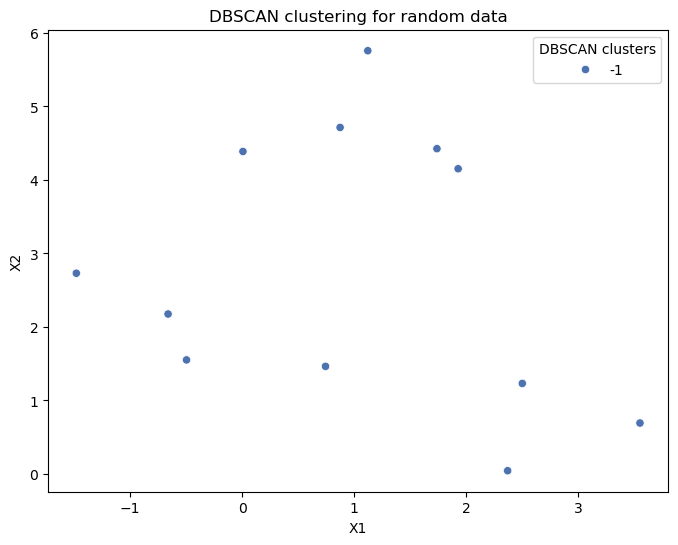

In [5]:
visData = pd.DataFrame({"X1" : X[:, 0], "X2" : X[:, 1]})
visData["DBSCAN clusters"] = dbscan.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data = visData, x = "X1", y = "X2", hue = "DBSCAN clusters", palette="deep")
plt.title("DBSCAN clustering for random data")
plt.show()

Let us try our with some different values for `min_samples` and `eps`:

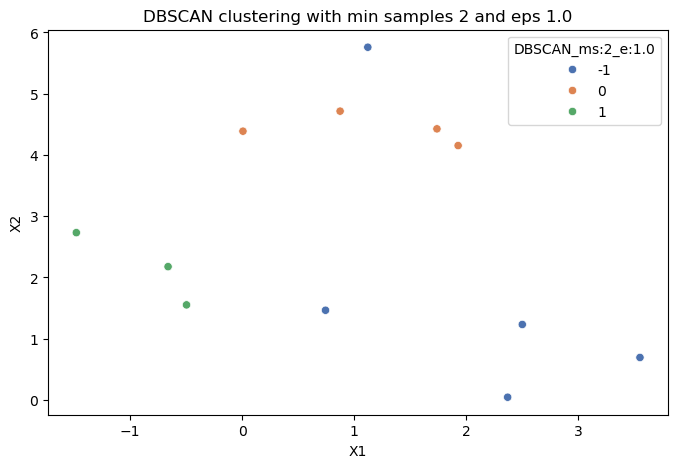

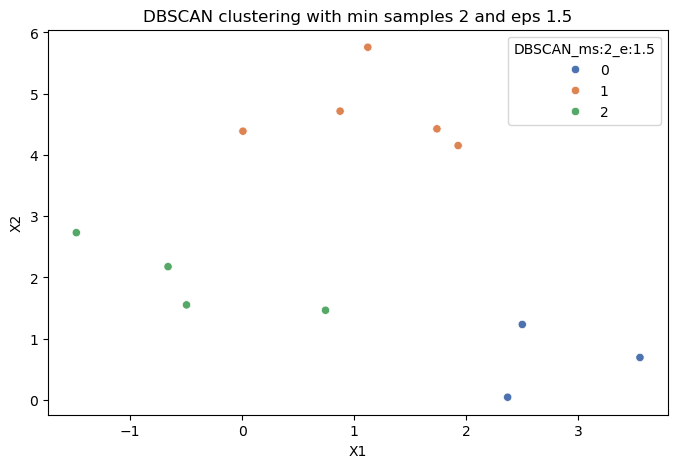

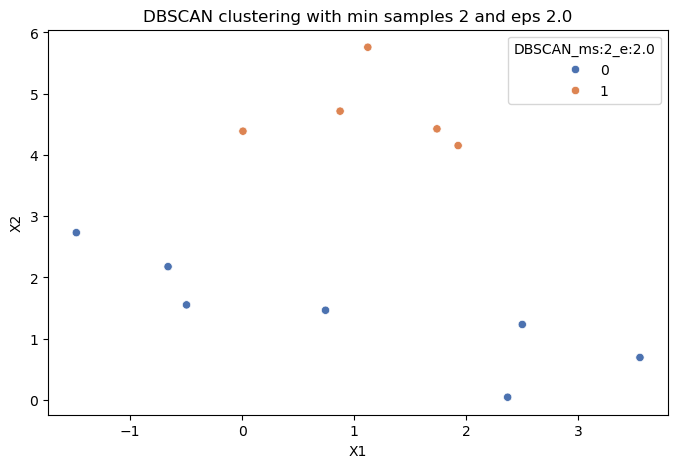

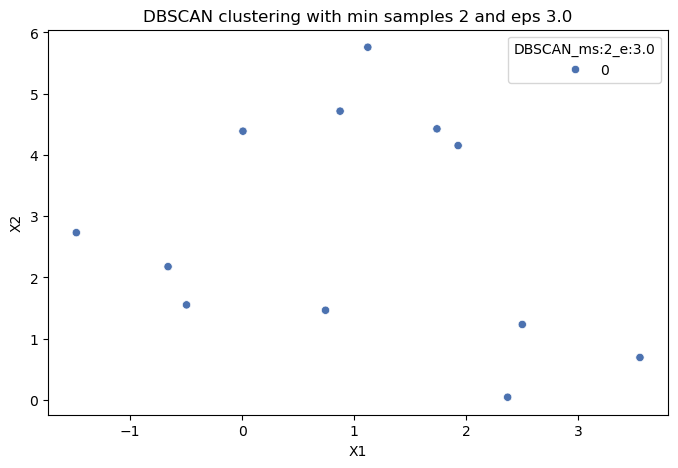

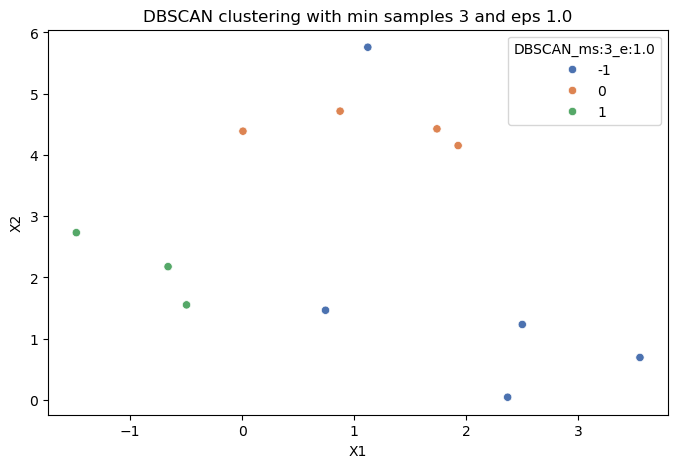

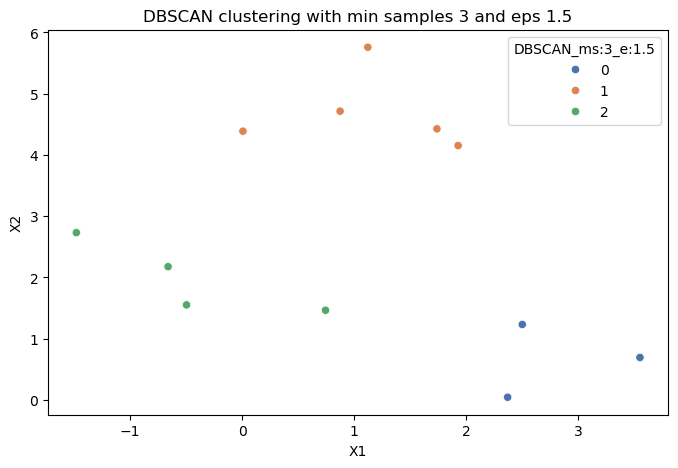

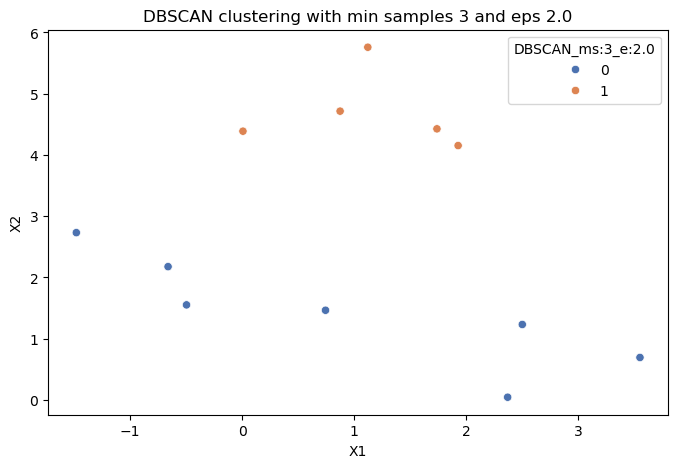

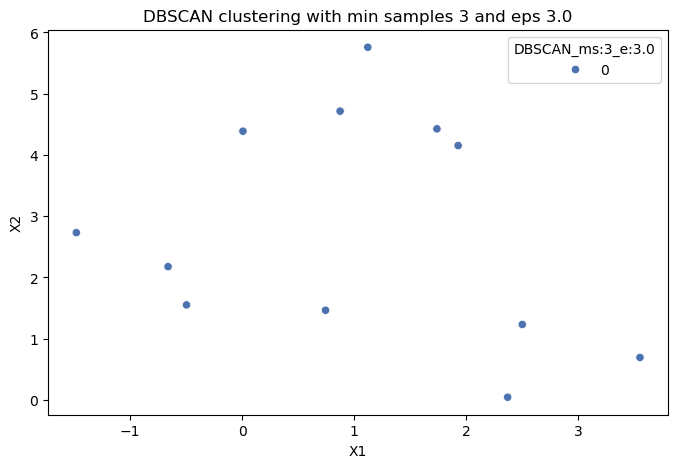

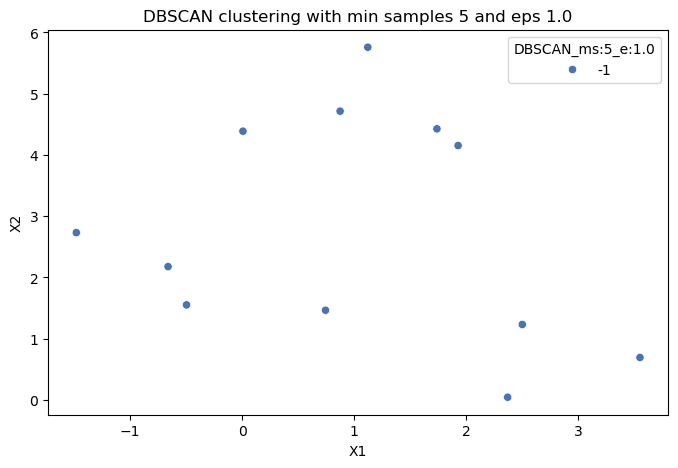

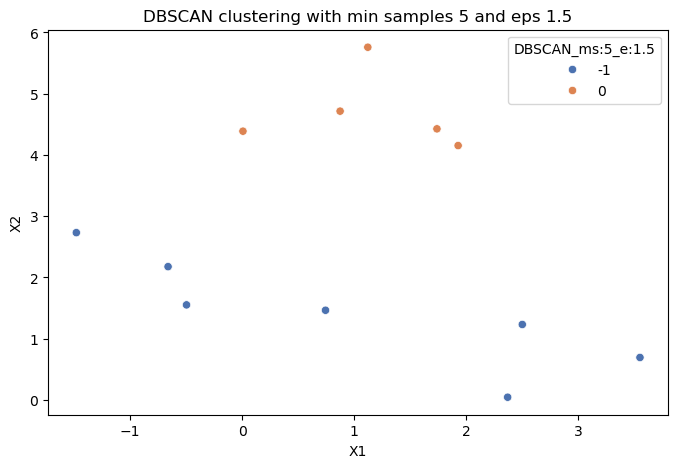

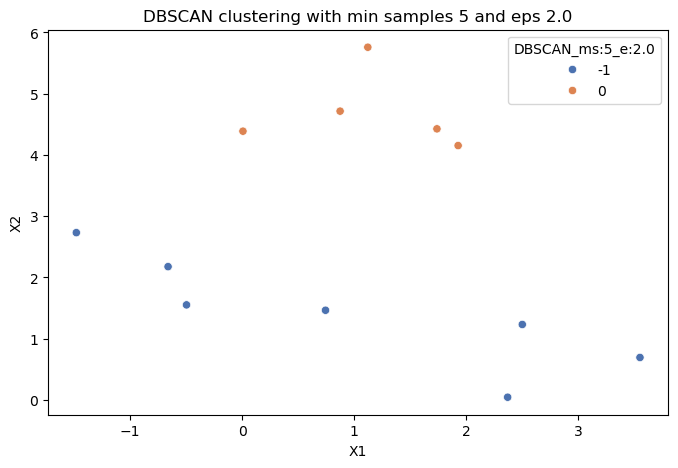

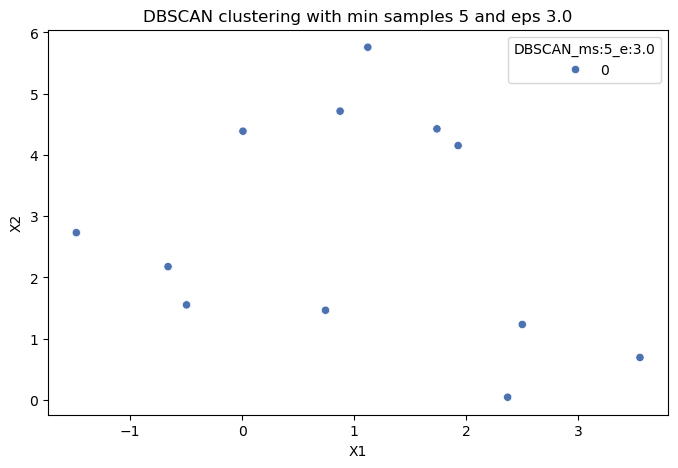

In [6]:
minSamples = [2, 3, 5]
eps = [1.0, 1.5, 2.0, 3.0]

for ms in minSamples:
    for e in eps:
        dbscan = DBSCAN(min_samples = ms, eps = e)
        clusters = dbscan.fit_predict(X) 
        visData["DBSCAN_ms:{0}_e:{1}".format(ms, e)] = dbscan.labels_
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data = visData, x = "X1", y = "X2", hue = "DBSCAN_ms:{0}_e:{1}".format(ms, e), palette="deep")
        plt.title("DBSCAN clustering with min samples {0} and eps {1}".format(ms, e))
plt.show()
        

**Observations**:
* When eps is fixed, a larger min_samples results in fewer core points, more non-core points and more outliers.
* When min_samples is fixed, a larger eps results in more core points, fewer non-core and outliers, and fewer clusters.
* All outliers and all in one cluster are two cases that are kinda opposite to each other w.r.t. the setting of eps and min_samples.

Finally, let us try DBSCAN on the moon example.

In [7]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

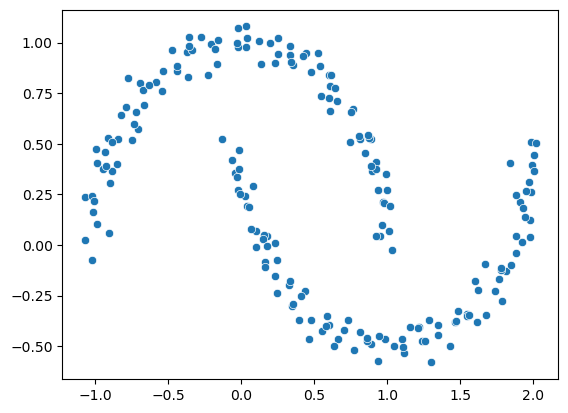

In [8]:
sns.scatterplot(x = X[:, 0], y = X[:, 1])
plt.show()

Let us first try K-Means clustering:

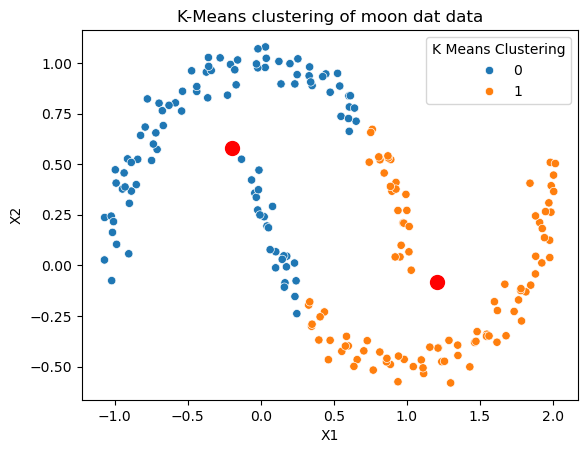

In [10]:
import warnings
warnings.filterwarnings('ignore')

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

visData = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1]})
visData["K Means Clustering"] = kmeans.labels_

sns.scatterplot(data = visData, x = "X1", y = "X2", hue = "K Means Clustering")
plt.scatter(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], color='red', s = 100)
plt.title("K-Means clustering of moon dat data")
plt.show()

Let us also try with Agglomerative clustering:

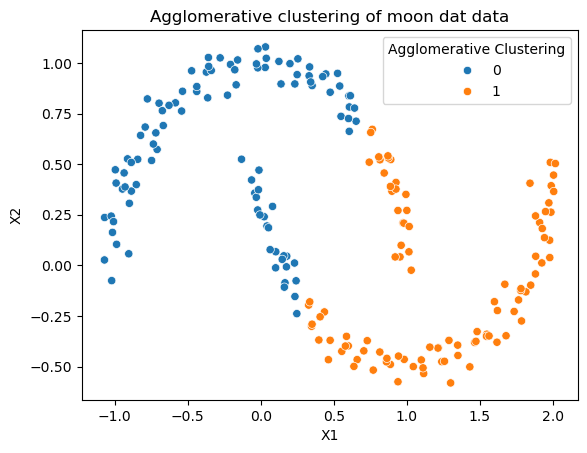

In [11]:
aggClustering = AgglomerativeClustering(n_clusters=3)
aggClustering.fit(X)

visData["Agglomerative Clustering"] = kmeans.labels_

sns.scatterplot(data = visData, x = "X1", y = "X2", hue = "Agglomerative Clustering")
plt.title("Agglomerative clustering of moon dat data")
plt.show()

And now finally, with DBSCAN:

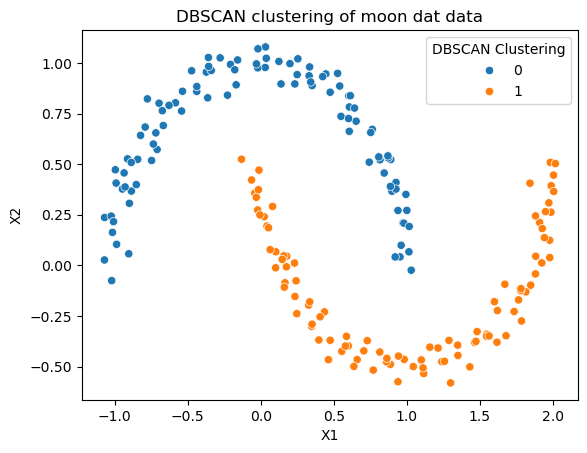

In [12]:
dbscan = DBSCAN(eps=0.2)
visData["DBSCAN Clustering"] = dbscan.fit_predict(X)  

sns.scatterplot(data = visData, x = "X1", y = "X2", hue = "DBSCAN Clustering")
plt.title("DBSCAN clustering of moon dat data")
plt.show()